In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import pygmt
import numpy as np
import datetime as dt

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy_geopd/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
df_ctd=pd.read_csv('/fs/site5/eccc/crd/ccrn/users/rpg002/stat_downscaling-workshop/data/lineP_ctds/lineP_CTD_training.csv',skiprows=24)
df_ctd['Sta']=[int(el[1:]) for el in df_ctd.STATION_ID.values[:]]
df_ctd['tdt']=[dt.datetime.strptime(el,'%Y-%m-%d %H:%M:%S') for el in df_ctd.TIME]
df_ctd['YM']=[f"{el.year}{el.month:02}" for el in df_ctd['tdt']]
df_ctd['hasT']=[1 if el>0 else 0 for el in df_ctd['TEMPERATURE']]
df_ctd

,STATION_ID,TIME,LATITUDE,LONGITUDE,DEPTH,PRESSURE,PRESSURE_BIN_CNTR,TEMPERATURE,SALINITY,OXYGEN_MMOL_M3,OXYGEN_UMOL_KG,Sta,tdt,YM,hasT
0,P26,1969-08-26 22:18:00,50.000000,-145.00000,0.000000,0.000000,0.5,12.3000,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
1,P26,1969-08-26 22:18:00,50.000000,-145.00000,5.000000,5.043289,5.5,12.1500,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
2,P26,1969-08-26 22:18:00,50.000000,-145.00000,10.000000,10.086701,10.5,12.1200,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
3,P26,1969-08-26 22:18:00,50.000000,-145.00000,32.000000,32.279182,32.5,8.5000,32.5200,NaN,NaN,26,1969-08-26 22:18:00,196908,1
4,P26,1969-08-26 22:18:00,50.000000,-145.00000,35.000000,35.305614,35.5,7.8000,32.5400,NaN,NaN,26,1969-08-26 22:18:00,196908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233798,P17,2020-02-13 12:39:40,49.350166,-135.66684,1974.521684,2001.000000,2001.5,1.9819,34.5800,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233799,P17,2020-02-13 12:39:40,49.350166,-135.66684,1975.503826,2002.000000,2002.5,1.9802,34.5804,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233800,P17,2020-02-13 12:39:40,49.350166,-135.66684,1976.485963,2003.000000,2003.5,1.9801,34.5804,53.52,52.0,17,2020-02-13 12:39:40,202002,1
5233801,P17,2020-02-13 12:39:40,49.350166,-135.66684,1977.468096,2004.000000,2004.5,1.9800,34.5805,53.52,52.0,17,2020-02-13 12:39:40,202002,1


In [3]:
dfctd1=df_ctd.loc[df_ctd.hasT>0,['Sta','YM','LONGITUDE','LATITUDE']].groupby(['Sta','YM']).mean().reset_index().groupby('Sta').agg(
    N=pd.NamedAgg(column="YM", aggfunc="count"),
    lat=pd.NamedAgg(column="LATITUDE", aggfunc="mean"),
    lon=pd.NamedAgg(column="LONGITUDE", aggfunc="mean"))

In [4]:
dfctd1

,N,lat,lon
Sta,,,
4,128,48.649902,-126.666532
5,101,48.691993,-127.166304
6,124,48.743247,-127.666420
7,109,48.776601,-128.166435
8,119,48.816668,-128.666679
9,113,48.856554,-129.166098
10,116,48.893238,-129.666533
11,109,48.933311,-130.166603
12,115,48.969913,-130.666538


In [5]:
#points1 = pygmt.project(center=[-126.67,48.65], endpoint=[-145,50], generate=.33) #true station end points
points1 = pygmt.project(center=[-144.9,50], endpoint=[-126.6,48.65], generate=.333)

In [6]:
npoints=38
lats=np.linspace(50,48.65,npoints)
lons=np.linspace(-145,-126.7,npoints)
print(lats)

[50.         49.96351351 49.92702703 49.89054054 49.85405405 49.81756757
 49.78108108 49.74459459 49.70810811 49.67162162 49.63513514 49.59864865
 49.56216216 49.52567568 49.48918919 49.4527027  49.41621622 49.37972973
 49.34324324 49.30675676 49.27027027 49.23378378 49.1972973  49.16081081
 49.12432432 49.08783784 49.05135135 49.01486486 48.97837838 48.94189189
 48.90540541 48.86891892 48.83243243 48.79594595 48.75945946 48.72297297
 48.68648649 48.65      ]


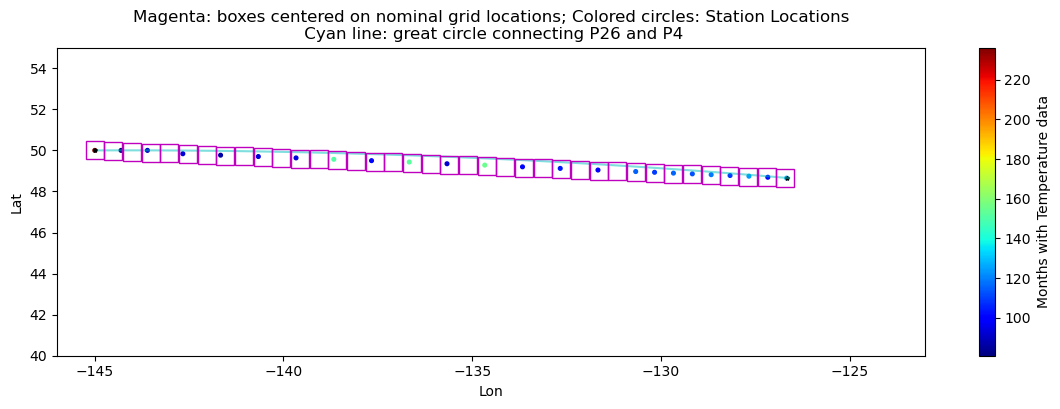

In [7]:
fig,ax=plt.subplots(1,1,figsize=(14,4))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-146,-123)
ax.set_ylim(40,55)
ax.set_yticks
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
fig.savefig('gridbasis.png',bbox_inches='tight',dpi=100)

In [8]:
np.diff(lons)

array([0.49459459, 0.49459459, 0.49459459, 0.49459459, 0.49459459,
       0.49459459, 0.49459459, 0.49459459, 0.49459459, 0.49459459,
       0.49459459, 0.49459459, 0.49459459, 0.49459459, 0.49459459,
       0.49459459, 0.49459459, 0.49459459, 0.49459459, 0.49459459,
       0.49459459, 0.49459459, 0.49459459, 0.49459459, 0.49459459,
       0.49459459, 0.49459459, 0.49459459, 0.49459459, 0.49459459,
       0.49459459, 0.49459459, 0.49459459, 0.49459459, 0.49459459,
       0.49459459, 0.49459459])

In [9]:
#dx=.5*np.cosd(50) %.5 degrees lon in km/111
#dxlatdeg=.5*np.cosd(50)
dylat=np.diff(lons)[0]*np.cos(np.pi*50/180)

In [10]:
lats[0]

np.float64(50.0)

[np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(35)]


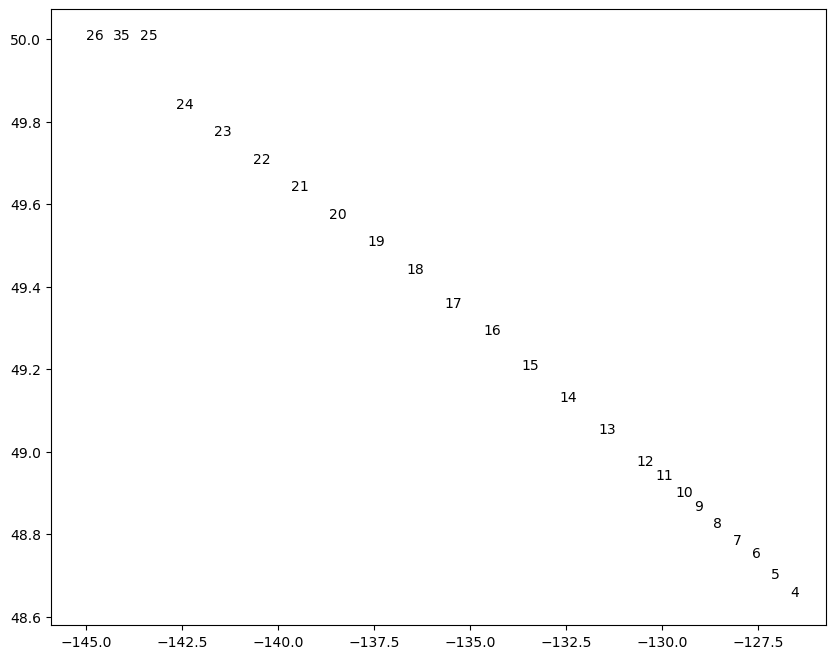

In [11]:
stations=df_ctd.Sta.unique()
print(sorted(stations))
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(df_ctd.LONGITUDE,df_ctd.LATITUDE,'w.',alpha=.2)
for ist in stations:
    lo,la=df_ctd.loc[df_ctd.Sta==ist,['LONGITUDE','LATITUDE']].values[0,:]
    ax.annotate(f"{ist}",xy=[lo,la],xycoords='data')

In [12]:
glon=np.expand_dims(lons,axis=0)
glat=np.expand_dims(lats,axis=0)
lonedges_lo=np.empty(npoints)
lonedges_hi=np.empty(npoints)
lonedges_lo[0]=lons[0]-(lons[1]-lons[0])/2
lonedges_lo[1:]=(lons[:-1]+lons[1:])/2
lonedges_hi[:-1]=(lons[:-1]+lons[1:])/2
lonedges_hi[-1]=lons[-1]+(lons[-1]-lons[-2])/2
latedges_lo=lats-dylat/2
latedges_hi=lats+dylat/2

Text(0.5, 1.0, 'Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')

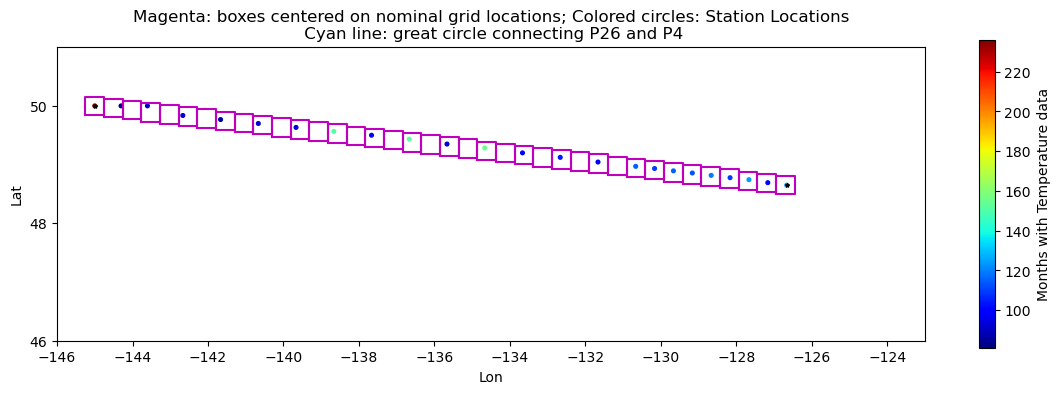

In [13]:
fig,ax=plt.subplots(1,1,figsize=(14,4))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
ax.plot(-145,50,'k*',ms=3)
ax.plot(-126.67,48.65,'k*',ms=3)
#ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
for ii in range(0,38):
    ax.plot([lonedges_lo[ii],lonedges_lo[ii],lonedges_hi[ii],lonedges_hi[ii],lonedges_lo[ii]],
            [latedges_lo[ii],latedges_hi[ii],latedges_hi[ii],latedges_lo[ii],latedges_lo[ii]],'m-')
#ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-146,-123)
ax.set_ylim(46,51)
ax.set_xticks(np.arange(-146,-122,2))
ax.set_yticks(np.arange(46,52,2))
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_aspect(1/np.cos(50*np.pi/180))
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
#fig.savefig('gridbasis.png',bbox_inches='tight',dpi=100)

In [14]:
lats

array([50.        , 49.96351351, 49.92702703, 49.89054054, 49.85405405,
       49.81756757, 49.78108108, 49.74459459, 49.70810811, 49.67162162,
       49.63513514, 49.59864865, 49.56216216, 49.52567568, 49.48918919,
       49.4527027 , 49.41621622, 49.37972973, 49.34324324, 49.30675676,
       49.27027027, 49.23378378, 49.1972973 , 49.16081081, 49.12432432,
       49.08783784, 49.05135135, 49.01486486, 48.97837838, 48.94189189,
       48.90540541, 48.86891892, 48.83243243, 48.79594595, 48.75945946,
       48.72297297, 48.68648649, 48.65      ])

In [15]:
gridSpecs=pd.DataFrame(data=np.concatenate((glon,glat),axis=0).transpose(),columns=['nom_lon','nom_lat'],index=np.arange(0,38))
gridSpecs

,nom_lon,nom_lat
0,-145.000000,50.000000
1,-144.505405,49.963514
2,-144.010811,49.927027
3,-143.516216,49.890541
4,-143.021622,49.854054
5,-142.527027,49.817568
6,-142.032432,49.781081
7,-141.537838,49.744595
8,-141.043243,49.708108
9,-140.548649,49.671622


In [16]:
gridSpecs['lonedges_lo']=lonedges_lo
gridSpecs['lonedges_hi']=lonedges_hi
gridSpecs['latedges_lo']=latedges_lo
gridSpecs['latedges_hi']=latedges_hi
gridSpecs['Sta']=None
gridSpecs['StaLon']=None
gridSpecs['StaLat']=None

In [17]:
lo=-129
la=48.8
search=gridSpecs.loc[(gridSpecs['lonedges_lo']<lo)&(gridSpecs['lonedges_hi']>=lo)&(gridSpecs['latedges_lo']<la)&(gridSpecs['latedges_hi']>=la)].index.values
if len(search)==0: 
    ind=-1
else:
    ind=search[0]
ind

np.int64(32)

In [18]:
def getgridind(lo,la):
    search=gridSpecs.loc[(gridSpecs['lonedges_lo']<lo)&(gridSpecs['lonedges_hi']>=lo)&(gridSpecs['latedges_lo']<la)&(gridSpecs['latedges_hi']>=la)].index.values
    if len(search)==0: 
        ind=-1
    else:
        ind=search[0]
    return ind

for sta, irow in dfctd1.iterrows():
    gridind=getgridind(irow['lon'],irow['lat'])
    print(sta,gridind)
    if gridind>=0: 
        gridSpecs.at[gridind,'Sta']=sta
        gridSpecs.at[gridind,'StaLon']=irow['lon']
        gridSpecs.at[gridind,'StaLat']=irow['lat']
    else:
        print('Error:',sta,lat,lon,gridind)

4 37
5 36
6 35
7 34
8 33
9 32
10 31
11 30
12 29
13 27
14 25
15 23
16 21
17 19
18 17
19 15
20 13
21 11
22 9
23 7
24 5
25 3
26 0
35 1


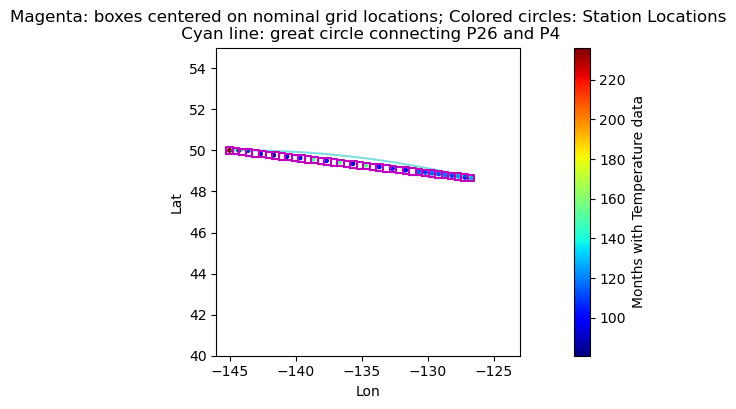

In [19]:
fig,ax=plt.subplots(1,1,figsize=(14,4))
m=ax.scatter(dfctd1.lon,dfctd1.lat,c=dfctd1.N,s=7,cmap='jet')
fig.colorbar(m,ax=ax,label='Months with Temperature data')
#ax.plot(-145,50,'k*',ms=3)
#ax.plot(-126.67,48.65,'k*',ms=3)
ax.plot(points1.r,points1.s,'c-',markersize=15,alpha=.5)
for ii in range(0,npoints):
    ax.plot([gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_lo[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_hi[ii],gridSpecs.lonedges_lo[ii]],
            [gridSpecs.latedges_lo[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_hi[ii],gridSpecs.latedges_lo[ii],gridSpecs.latedges_lo[ii]],'m-')
#ax.plot(lons,lats,'s',markersize=13,markeredgecolor='m',markerfacecolor='none')
ax.set_xlim(-146,-123)
ax.set_ylim(40,55)
ax.set_xlabel('')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_title('Magenta: boxes centered on nominal grid locations; Colored circles: Station Locations\n Cyan line: great circle connecting P26 and P4')
ax.set_aspect(1/np.cos(50*np.pi/180))
fig.savefig('gridout.png',bbox_inches='tight',dpi=100)

In [20]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat
0,-145.000000,50.000000,-145.247297,-144.752703,49.841040,50.158960,26,-144.999964,50.000064
1,-144.505405,49.963514,-144.752703,-144.258108,49.804554,50.122473,35,-144.303145,50.00018
2,-144.010811,49.927027,-144.258108,-143.763514,49.768067,50.085987,None,None,None
3,-143.516216,49.890541,-143.763514,-143.268919,49.731581,50.049500,25,-143.604824,50.000043
4,-143.021622,49.854054,-143.268919,-142.774324,49.695094,50.013014,None,None,None
5,-142.527027,49.817568,-142.774324,-142.279730,49.658608,49.976527,24,-142.66643,49.836511
6,-142.032432,49.781081,-142.279730,-141.785135,49.622121,49.940041,None,None,None
7,-141.537838,49.744595,-141.785135,-141.290541,49.585635,49.903554,23,-141.666523,49.766936
8,-141.043243,49.708108,-141.290541,-140.795946,49.549148,49.867068,None,None,None
9,-140.548649,49.671622,-140.795946,-140.301351,49.512662,49.830581,22,-140.666213,49.700141


In [21]:
gridSpecs['Index']=gridSpecs.index

In [22]:
gridSpecs.to_csv('gridspecs.csv')

In [23]:
gridSpecs

,nom_lon,nom_lat,lonedges_lo,lonedges_hi,latedges_lo,latedges_hi,Sta,StaLon,StaLat,Index
0,-145.000000,50.000000,-145.247297,-144.752703,49.841040,50.158960,26,-144.999964,50.000064,0
1,-144.505405,49.963514,-144.752703,-144.258108,49.804554,50.122473,35,-144.303145,50.00018,1
2,-144.010811,49.927027,-144.258108,-143.763514,49.768067,50.085987,None,None,None,2
3,-143.516216,49.890541,-143.763514,-143.268919,49.731581,50.049500,25,-143.604824,50.000043,3
4,-143.021622,49.854054,-143.268919,-142.774324,49.695094,50.013014,None,None,None,4
5,-142.527027,49.817568,-142.774324,-142.279730,49.658608,49.976527,24,-142.66643,49.836511,5
6,-142.032432,49.781081,-142.279730,-141.785135,49.622121,49.940041,None,None,None,6
7,-141.537838,49.744595,-141.785135,-141.290541,49.585635,49.903554,23,-141.666523,49.766936,7
8,-141.043243,49.708108,-141.290541,-140.795946,49.549148,49.867068,None,None,None,8
9,-140.548649,49.671622,-140.795946,-140.301351,49.512662,49.830581,22,-140.666213,49.700141,9


In [24]:
import numpy as np
.5*111*np.cos(50)

np.float64(53.55561458131229)